1. Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает.
2. Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

2023-09-25 17:52:28.807426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 17:52:28.997740: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 17:52:28.999169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 17:52:30.118927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.random.set_seed(1)

In [4]:
results = pd.DataFrame()
step = []
desc = []
train_acc = []
test_acc = []

In [5]:
batch_size = 64
num_classes = 10
epochs = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 54s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [6]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

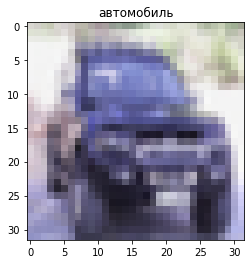

In [7]:
N = 9
plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [8]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))
model_1.summary()
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [9]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 49s 60ms/step - loss: 1.9939 - accuracy: 0.2226 - val_loss: 1.7571 - val_accuracy: 0.3109
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 1.7101 - accuracy: 0.3356 - val_loss: 1.5853 - val_accuracy: 0.3931
Epoch 3/10
782/782 [==============================] - 45s 58ms/step - loss: 1.5981 - accuracy: 0.3874 - val_loss: 1.3941 - val_accuracy: 0.4747
Epoch 4/10
782/782 [==============================] - 45s 58ms/step - loss: 1.5048 - accuracy: 0.4353 - val_loss: 1.3464 - val_accuracy: 0.4863
Epoch 5/10
782/782 [==============================] - 46s 58ms/step - loss: 1.4220 - accuracy: 0.4714 - val_loss: 1.2314 - val_accuracy: 0.5438
Epoch 6/10
782/782 [==============================] - 45s 58ms/step - loss: 1.3575 - accuracy: 0.5018 - val_loss: 1.2137 - val_accuracy: 0.5498
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 1.3139 - accuracy: 0.5221 - val_loss: 1.1388 - val_accuracy:

In [10]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')
step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 10s - loss: 0.9735 - accuracy: 0.6544 - 10s/epoch - 6ms/step
313/313 - 2s - loss: 1.0233 - accuracy: 0.6340 - 2s/epoch - 7ms/step
train_loss: 0.9735027551651001, train_accuracy: 0.654420018196106
test_loss: 1.0233094692230225, test_accuracy: 0.6340000033378601


1/1 [==============================] - 0s 135ms/step


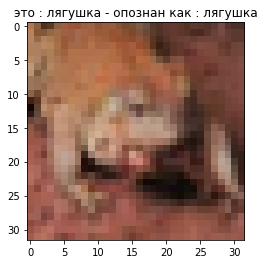

In [11]:
N = 5
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [12]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))
model_2.summary()
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [13]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 115s 145ms/step - loss: 1.9542 - accuracy: 0.2396 - val_loss: 1.6858 - val_accuracy: 0.3497
Epoch 2/10
782/782 [==============================] - 115s 147ms/step - loss: 1.6181 - accuracy: 0.3833 - val_loss: 1.3819 - val_accuracy: 0.4878
Epoch 3/10
782/782 [==============================] - 119s 152ms/step - loss: 1.4497 - accuracy: 0.4671 - val_loss: 1.2511 - val_accuracy: 0.5431
Epoch 4/10
782/782 [==============================] - 118s 151ms/step - loss: 1.3272 - accuracy: 0.5210 - val_loss: 1.1476 - val_accuracy: 0.5775
Epoch 5/10
782/782 [==============================] - 122s 156ms/step - loss: 1.2415 - accuracy: 0.5575 - val_loss: 1.0627 - val_accuracy: 0.6122
Epoch 6/10
782/782 [==============================] - 130s 167ms/step - loss: 1.1644 - accuracy: 0.5898 - val_loss: 0.9912 - val_accuracy: 0.6475
Epoch 7/10
782/782 [==============================] - 122s 156ms/step - loss: 1.1085 - accuracy: 0.6119 - val_loss: 0.9345 -

In [14]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')
step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 30s - loss: 0.7627 - accuracy: 0.7334 - 30s/epoch - 19ms/step
313/313 - 6s - loss: 0.8424 - accuracy: 0.7099 - 6s/epoch - 19ms/step
train_loss: 0.7627005577087402, train_accuracy: 0.7334200143814087
test_loss: 0.8423581123352051, test_accuracy: 0.7099000215530396


1/1 [==============================] - 0s 92ms/step


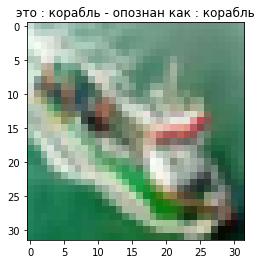

In [15]:
N = 15
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [16]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))
model_3.summary()
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [17]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))    

Epoch 1/10
782/782 [==============================] - 52s 65ms/step - loss: 2.0060 - accuracy: 0.2033 - val_loss: 1.7922 - val_accuracy: 0.2973
Epoch 2/10
782/782 [==============================] - 50s 64ms/step - loss: 1.7367 - accuracy: 0.3264 - val_loss: 1.4486 - val_accuracy: 0.4609
Epoch 3/10
782/782 [==============================] - 50s 64ms/step - loss: 1.5048 - accuracy: 0.4402 - val_loss: 1.3146 - val_accuracy: 0.5086
Epoch 4/10
782/782 [==============================] - 47s 61ms/step - loss: 1.3755 - accuracy: 0.5032 - val_loss: 1.1816 - val_accuracy: 0.5700
Epoch 5/10
782/782 [==============================] - 48s 61ms/step - loss: 1.2750 - accuracy: 0.5486 - val_loss: 1.0522 - val_accuracy: 0.6221
Epoch 6/10
782/782 [==============================] - 48s 61ms/step - loss: 1.1895 - accuracy: 0.5872 - val_loss: 1.0000 - val_accuracy: 0.6378
Epoch 7/10
782/782 [==============================] - 48s 61ms/step - loss: 1.1313 - accuracy: 0.6091 - val_loss: 0.9464 - val_accuracy:

In [18]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')
step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 11s - loss: 0.7656 - accuracy: 0.7267 - 11s/epoch - 7ms/step
313/313 - 2s - loss: 0.8606 - accuracy: 0.7038 - 2s/epoch - 7ms/step
train_loss: 0.7656232118606567, train_accuracy: 0.7266799807548523
test_loss: 0.8605693578720093, test_accuracy: 0.7038000226020813


1/1 [==============================] - 0s 148ms/step


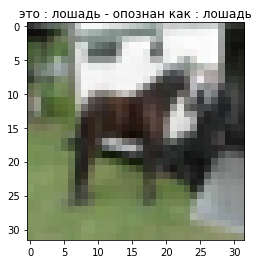

In [19]:
N = 20
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [20]:
model_4 = Sequential()
model_4.add(Flatten(input_shape=X_train.shape[1:]))
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dense(256))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))
model_4.summary()
model_4.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 activation_23 (Activation)  (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [21]:
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 10s 12ms/step - loss: 2.0110 - accuracy: 0.2620 - val_loss: 1.7668 - val_accuracy: 0.3665
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 1.8062 - accuracy: 0.3492 - val_loss: 1.7221 - val_accuracy: 0.3726
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 1.7256 - accuracy: 0.3852 - val_loss: 1.6145 - val_accuracy: 0.4267
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 1.6668 - accuracy: 0.4079 - val_loss: 1.5998 - val_accuracy: 0.4312
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 1.6314 - accuracy: 0.4197 - val_loss: 1.6004 - val_accuracy: 0.4318
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 1.5916 - accuracy: 0.4328 - val_loss: 1.5404 - val_accuracy: 0.4488
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 1.5703 - accuracy: 0.4436 - val_loss: 1.5202 - val_accuracy: 0.453

In [22]:
train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')
step.append(4)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 3s - loss: 1.4489 - accuracy: 0.4788 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 1.5161 - accuracy: 0.4562 - 664ms/epoch - 2ms/step
train_loss: 1.448934555053711, train_accuracy: 0.4788399934768677
test_loss: 1.5160692930221558, test_accuracy: 0.4562000036239624


1/1 [==============================] - 0s 81ms/step


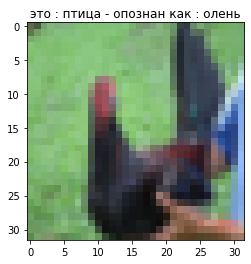

In [23]:
N = 25
y_p = model_4.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [24]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc

In [25]:
results

,step,desc,train_acc,test_acc
0,1,Базовая модель,0.65,0.63
1,2,Шире - больше каналов,0.73,0.71
2,3,Глубже - больше слоев,0.73,0.70
3,4,Полносвязная сеть,0.48,0.46


- Лучше всего помогло увеличение количества каналов (количества признаков).
- Увеличение глубины также помогло улучшить точность предсказаний.
- Полносвязная сеть понизила точность.